In [32]:
%pylab inline
from halo import *
from octopus import density
from matplotlib import ticker

Populating the interactive namespace from numpy and matplotlib


In [37]:
font = {'size':18, 'family':'serif'}
plt.matplotlib.rc('font', **font)

In [15]:
lmc_orbit = np.loadtxt('../../code/LMC_orbit/orbits/LMC6_H1.txt')
orbitx = lmc_orbit[:,2]
orbity = lmc_orbit[:,3]
orbitz = lmc_orbit[:,4]

orbit = np.array([orbitx, orbity, orbitz]).T

In [77]:
def plot_pot_contours(idx, S, T, grid_max=250., n_grid=300):
    _grid = np.zeros((3,n_grid*n_grid))
    _grid[idx] = np.vstack(map(np.ravel, np.meshgrid(np.linspace(-grid_max,grid_max,n_grid),
                                                     np.linspace(-grid_max,grid_max,n_grid))))

    dens = biff.potential(np.ascontiguousarray(_grid.T), S, T, G=1, M=1.0, r_s=40.85)
    dens = np.abs(dens)
    
    percs = np.log10([dens[dens > 0].min(), dens[dens > 0].max()])
    levels = np.logspace(percs[0], percs[1], 16)
    
    shp = (n_grid, n_grid)

    fig,ax = subplots(1,1,figsize=(6,6))


    ax.contourf(_grid[idx[0]].reshape(shp), _grid[idx[1]].reshape(shp),
                dens.reshape(shp), cmap='Greys', levels=levels, locator=ticker.LogLocator())

    ax.set_xlim(-grid_max, grid_max)
    ax.set_ylim(-grid_max, grid_max)
    
    ax.set_xlabel("${} [kpc]$".format('xyz'[idx[0]]), fontsize=25)
    ax.set_ylabel("${} [kpc]$".format('xyz'[idx[1]]), fontsize=25)
    
    tmp = np.array([0,1,2])
    tmp = np.delete(tmp, np.where((tmp==idx[0]) | (tmp == idx[1]))[0])
    #ax.set_title("Isodensity contours at ${}=0$".format('xyz'[tmp[0]]))

    fig.tight_layout()
    
    return fig,ax

In [57]:
# SCF
NDM_part = 1000000
r_cut = 200
res = 100

def density_contour(N_snap, r_cut=r_cut, res=res):
    MW_pos, MW_vel, MW_M, MW_pot, LMC_pos, LMC_vel, LMC_M, LMC_pot = reading_snaps('../../data/LMCMW/MWmLMC6/H1/', 'MWfLMC6H1', N_snap, NDM_part)
    LMC_pos_c = recenter_halo(LMC_pos, orbit[N_snap])
    LMC_pos_t, LMC_vel_t, LMC_M_t, LMC_pot_t = truncate(LMC_pos_c, LMC_vel, r_cut, LMC_M, LMC_pot)
    rho_LMC = density.grid(LMC_pos_t[:,1], LMC_pos_t[:,2], LMC_pos_t[:,0], res)
    return rho_LMC



In [73]:
rho_LMC_0 = density_contour(0, 200, 100)


In [74]:
rho_LMC_40 = density_contour(40, 200, 100)


In [75]:
rho_LMC_80 = density_contour(80, 200, 120)

In [76]:
rho_LMC_119 = density_contour(119, 200, 120)

In [81]:
MW_pos, MW_vel, MW_M, MW_pot, LMC_pos0, LMC_vel, LMC_M, LMC_pot = reading_snaps('../../data/LMCMW/MWmLMC6/H1/', 'MWfLMC6H1', 0, NDM_part)
MW_pos, MW_vel, MW_M, MW_pot, LMC_pos40, LMC_vel, LMC_M, LMC_pot = reading_snaps('../../data/LMCMW/MWmLMC6/H1/', 'MWfLMC6H1', 40, NDM_part)
MW_pos, MW_vel, MW_M, MW_pot, LMC_pos80, LMC_vel, LMC_M, LMC_pot = reading_snaps('../../data/LMCMW/MWmLMC6/H1/', 'MWfLMC6H1', 80, NDM_part)
MW_pos, MW_vel, MW_M, MW_pot, LMC_pos119, LMC_vel, LMC_M, LMC_pot = reading_snaps('../../data/LMCMW/MWmLMC6/H1/', 'MWfLMC6H1', 119, NDM_part)


LMC_pos_c0 = recenter_halo(LMC_pos0, orbit[0])
LMC_pos_t0, LMC_vel_t, LMC_M_t, LMC_pot_t = truncate(LMC_pos_c0, LMC_vel, 300, LMC_M, LMC_pot)



LMC_pos_c40 = recenter_halo(LMC_pos40, orbit[40])
LMC_pos_t40, LMC_vel_t, LMC_M_t, LMC_pot_t = truncate(LMC_pos_c40, LMC_vel, 300, LMC_M, LMC_pot)



LMC_pos_c80 = recenter_halo(LMC_pos80, orbit[80])
LMC_pos_t80, LMC_vel_t, LMC_M_t, LMC_pot_t = truncate(LMC_pos_c80, LMC_vel, 300, LMC_M, LMC_pot)


LMC_pos_c119 = recenter_halo(LMC_pos119, orbit[119])
LMC_pos_t119, LMC_vel_t, LMC_M_t, LMC_pot_t = truncate(LMC_pos_c119, LMC_vel, 300, LMC_M, LMC_pot)

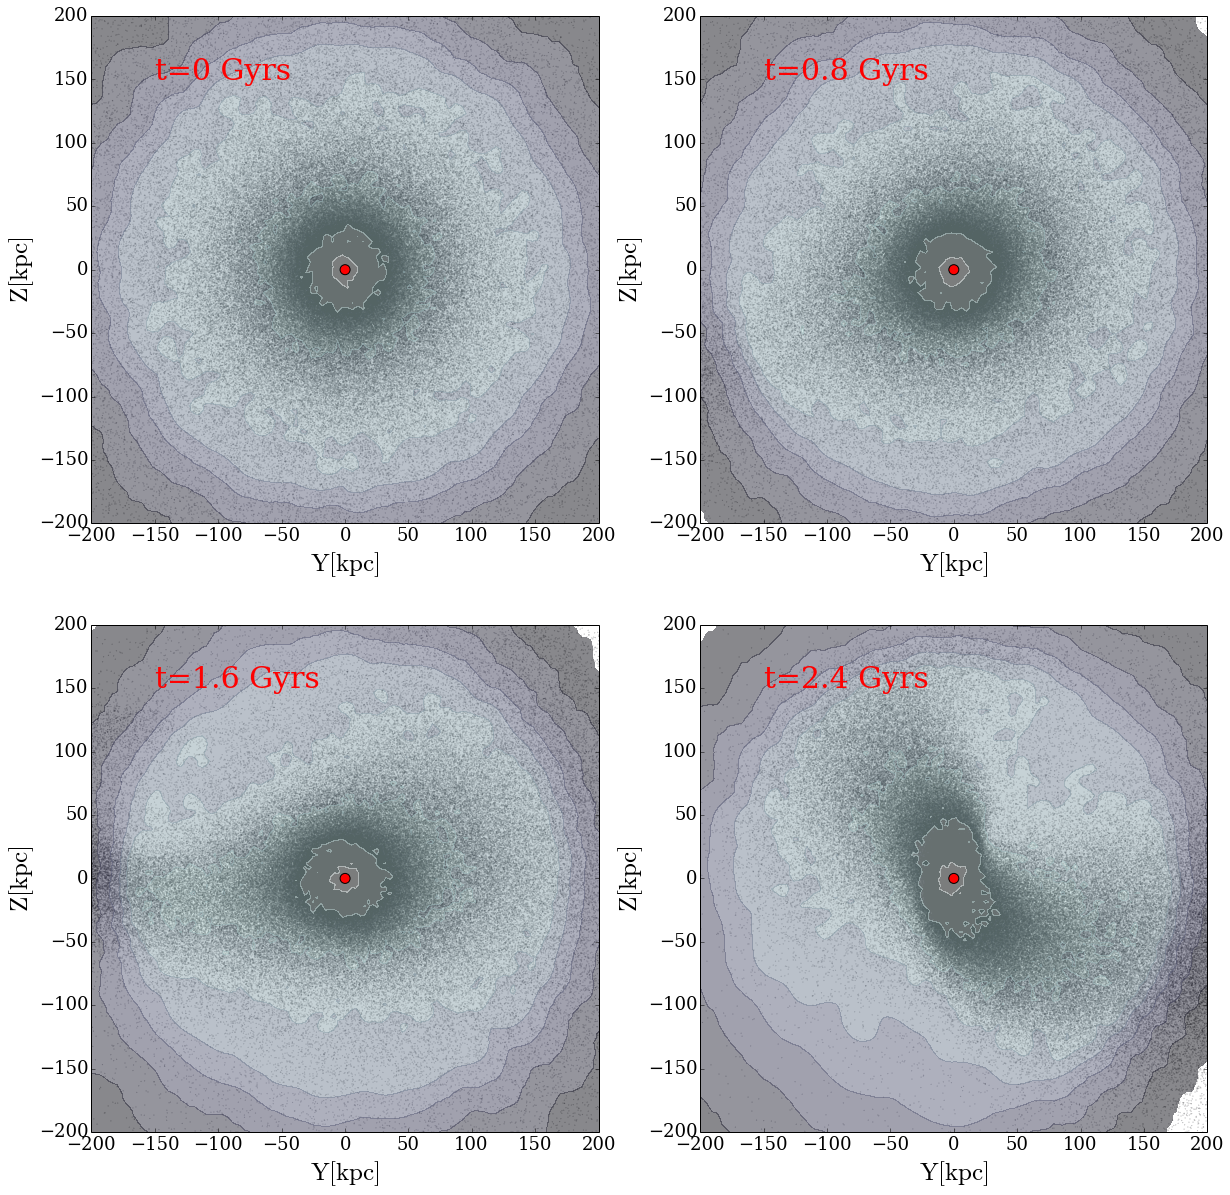

In [92]:
figure(figsize=(20,20))
subplot(2, 2, 1)
percs = np.log10([rho_LMC_0.min(), rho_LMC_0.max()])
levels = np.logspace(percs[0], (percs[1]), 10)
scatter(LMC_pos_t0[:,1], LMC_pos_t0[:,2], s=0.01, alpha=1)

contourf(np.linspace(-200, 200, 100), np.linspace(-200, 200, 100), (rho_LMC_0.T), cmap='bone', lw=2, locator=ticker.LogLocator(), levels=levels, 
        origin = 'lower', alpha=0.5)
scatter(0,0, c='r', s=100)
text(-150, 150, 't=0 Gyrs', color='r', fontsize=30)


xlabel('$\mathrm{Y[kpc]}$', fontsize=25)
ylabel('$\mathrm{Z[kpc]}$', fontsize=25)
xlim(-200, 200)
ylim(-200, 200)

subplot(2, 2, 2)
#percs = np.log10([rho_MW.min(), rho_MW.max()])
#levels = np.logspace(percs[0], (percs[1]), 10)
scatter(LMC_pos_t40[:,1], LMC_pos_t40[:,2], s=0.01, alpha=1)

contourf(np.linspace(-200, 200, 100), np.linspace(-200, 200, 100), (rho_LMC_40.T), cmap='bone', lw=2, locator=ticker.LogLocator(), levels=levels, 
        origin = 'lower', alpha=0.5)
scatter(0,0, c='r', s=100)
text(-150, 150, 't=0.8 Gyrs', color='r', fontsize=30)

xlabel('$\mathrm{Y[kpc]}$', fontsize=25)
ylabel('$\mathrm{Z[kpc]}$', fontsize=25)
xlim(-200, 200)
ylim(-200, 200)


subplot(2, 2, 3)
#percs = np.log10([rho_MW.min(), rho_MW.max()])
#levels = np.logspace(percs[0], (percs[1]), 10)
scatter(LMC_pos_t80[:,1], LMC_pos_t80[:,2], s=0.01, alpha=1)

contourf(np.linspace(-200, 200, 120), np.linspace(-200, 200, 120), (rho_LMC_80.T), cmap='bone', lw=2, locator=ticker.LogLocator(), levels=levels, 
        origin = 'lower', alpha=0.5)
scatter(0,0, c='r', s=100)
text(-150, 150, 't=1.6 Gyrs', color='r', fontsize=30)

xlabel('$\mathrm{Y[kpc]}$', fontsize=25)
ylabel('$\mathrm{Z[kpc]}$', fontsize=25)
xlim(-200, 200)
ylim(-200, 200)


subplot(2, 2, 4)
#percs = np.log10([rho_MW.min(), rho_MW.max()])
#levels = np.logspace(percs[0], (percs[1]), 10)
scatter(LMC_pos_t119[:,1], LMC_pos_t119[:,2], s=0.01, alpha=1)

contourf(np.linspace(-200, 200, 120), np.linspace(-200, 200, 120), (rho_LMC_119.T), cmap='bone', lw=2, locator=ticker.LogLocator(), levels=levels, 
        origin = 'lower', alpha=0.5)
scatter(0,0, c='r', s=100)
text(-150, 150, 't=2.4 Gyrs', color='r', fontsize=30)


xlabel('$\mathrm{Y[kpc]}$', fontsize=25)
ylabel('$\mathrm{Z[kpc]}$', fontsize=25)
xlim(-200, 200)
ylim(-200, 200)



savefig('LMC_dens_contourf_overt.png', bbox_inches='tight', dpi=300)

In [86]:
MW_pos, MW_vel, MW_M, MW_pot, LMC_pos, LMC_vel, LMC_M, LMC_pot = reading_snaps('../../data/LMCMW/MWmLMC6/H1/', 'MWfLMC6H1', 119, NDM_part)
LMC_pos_c = recenter_halo(LMC_pos, orbit[119])
LMC_pos_t, LMC_vel_t, LMC_M_t, LMC_pot_t = truncate(LMC_pos_c, LMC_vel, r_cut, LMC_M, LMC_pot)



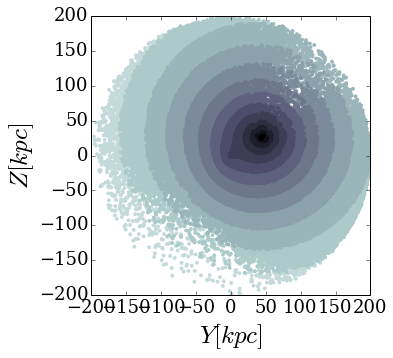

In [72]:
#pot_scatter(LMC_pot_t, LMC_pos_t[:,1], LMC_pos_t[:,2], '', -200, 200, -200, 200)
